# 1)Basic RL

In [ ]:
import numpy as np
class RoboEnv:
    def __init__ (self):
        self.state =(0,0)
        self.grid=[[0,-1,0,0],
                   [1,1,1,-1],
                   [0,-1,1,1]]
    def step(self,action):
        if action==0:#up
            new_state = (max(self.state[0]-1,0),self.state[1])
        elif action==1:#down
            new_state =(min(self.state[0]+1,len(self.grid)-1),self.state[1])
        elif action==2:
            new_state = (self.state[0],max(self.state[1]-1,0))
        elif action==3:
            new_state = (self.state[0],min(self.state[1]+1,len(self.grid[0])-1))
                                           
        reward = self.grid[new_state[0]][new_state[1]]
        done = (reward ==-1) or (new_state ==(len(self.grid)-1,len(self.grid[0])-1))
        self.state = new_state
        return new_state, reward, done
    def reset(self):
        self.state=(0,0)
        return self.state
class Agent:
    def __init__(self,random_actions):
        self.random_actions = random_actions
    def act(self,state):
        return np.random.choice(self.random_actions)
total_rewards =[]
my_agent = Agent(random_actions=[0,1,2,3])
env=RoboEnv()
num_episodes = 50
for episode in range(num_episodes):
    state=env.reset()
    
    done=False
    total_reward=0
    while not done:
        action = my_agent.act(state)
        next_state,reward,done = env.step(action)
        total_reward += reward
        state = next_state
    total_rewards.append(total_reward)
    
    print('TOTAL_REWARD',total_reward)


In [ ]:
# Plot the total reward obtained during each episode
import matplotlib.pyplot as plt
plt.plot(range(1, num_episodes+1), total_rewards)
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Total Reward per Episode')
plt.show()

# 2) Open AI gym

In [ ]:
import gym 
import time
env = gym.make('CartPole-v1',render_mode='human')
(state,_)=env.reset()
env.render()
env.step(0)
num_episodes = 5
timesteps = 100
for epiindex in range(num_episodes):
    initial_state = env.reset()
    print("episode_Index",epiindex)
    env.render()
    appended_observations=[]
    for timeindex in range(timesteps):
        print("Time_Index",timeindex)
        random_action = env.action_space.sample()
        observation,reward, terminated,truncated,info = env.step(random_action)#ortti
        appended_observations.append(observation)
        time.sleep(0.1)
        if (terminated):
            time.sleep(1)
            break
env.close()

# 3) Markov Chain

In [ ]:
import networkx as nx
G = nx.DiGraph()
G.add_nodes_from(['study','workout','eating','partying'])
G.add_edges_from([('study','workout',{'weight':0.8}),
                  ('study','partying',{'weight':0.7}),
                  ('partying','study',{'weight':0.2}),
                  ('study','partying',{'weight':0.8}),
                  ('workout','partying',{'weight':0.5}),
                  ('partying','eating',{'weight':0.22}),
                  ('workout','eating',{'weight':0.33}),
                  ('eating','eating',{'weight':0.2}),
                 ('study','eating',{'weight':0.5})])
pos = nx.spring_layout(G)
nx.draw_networkx_edges(G,pos)
nx.draw_networkx_nodes(G,pos)
nx.draw_networkx_labels(G,pos)
edge_labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G,pos,edge_labels)

# 4)MDP with value function

In [ ]:
import numpy as np
states =[0,1,2]
action=[0,1]
P = np.zeros((len(states),len(action),len(states)))
P[0,0,:]=[0.5,0.0,0.5]
P[0,1:]=[0.0,0.5,0.0]
P[1,0:]=[.5,.5,0.0]
P[1,1:]=[0.0,0.0,0.5]
P[2,1:]=[0.5,0.5,0.0]
P[1,2:]=[0.0,0.0,0.5]
R=np.array([[-1,0,1],
          [-1,0,1],
          [-1,0,1]])
gamma = 0.9
epsilon = 1e-6
V =np.zeros(len(states))
while True:
    delta = 0
    for s in states:
        v=V[s]
        Q=np.zeros(len(action))
        for a in action:
            Q[a]=sum(P[s,a,:]*(R[s,:]+gamma*V))
        V[s] =max(Q)
        delta=max(delta,abs(v-V[s]))
    if delta<epsilon:
        break
print("Optimal_value_function:",V)

## (5)MDP policy iteration

In [ ]:
import numpy as np

class MDP:
    def __init__(self):
        self.S = {0: 'read', 1: 'study', 2: 'eating', 3: 'sleeping'}
        self.P = np.array([[0.3, 0.3, 0.4, 0.0],
                           [0.9, 0.1, 0.0, 0.0],
                           [0.2, 0.3, 0.5, 0.0],
                           [0.0, 1.0, 0.0, 0.0]])
        self.R = np.array([10, 8, 7, 5])
        self.A = {0: [0, 1, 3], 1: [2, 3], 2: [3, 0], 3: [3, 0, 1]}
        self.gamma = 0.9
        self.V = [0, 0, 0, 0]
        self.policy = [1, 3, 2, 0]

    def value_evaluation(self, s, s1):
        val = self.P[s, s1] * (self.R[s] + self.gamma * self.V[s1])
        return val

    def policy_iteration(self):
        theta = delta = 1e-30
        while True:
            while not delta < theta:
                delta = 0
                for s in self.S:
                    v = self.V[s]
                    a = self.policy[s]
                    V = self.value_evaluation(s, a)
                    self.V[s] = V
                    delta = max([delta, abs(v - self.V[s])])
            pi_stable = True
            for s in self.S:
                old_policy = self.policy[s]
                new_policy = max([(self.value_evaluation(s, a), a) for a in self.A[s]])[1]
                self.policy[s] = new_policy
                if old_policy != new_policy:
                    pi_stable = False
            if pi_stable==True:
                break


mdp = MDP()
mdp.policy_iteration()
print(mdp.V)
print(mdp.policy)


## value iteration

In [1]:
# Value Iteration
import numpy as np

class MDP:
    def __init__(self):
        self.S = {0:"Sleep", 1:"Book", 2:"Project", 3:"Game", 4:"Publish Paper"}
        self.P = np.array([[0.3, 0.2, 0.2, 0.3, 0.0],
                  [0.2, 0.0, 0.8, 0.0, 0.0],
                  [0.1, 0.0, 0.0, 0.1, 0.8],
                  [0.6, 0.0, 0.4, 0.0, 0.0],
                  [0.0, 0.0, 0.0, 0.0, 1.0]])
        self.R = np.array([0, 0, 5, -5, 10])
        self.A = {0:[0,1,2,3], 1:[0,2], 2:[0,3,4], 3:[0,2], 4:[4]}
        self.gamma = 0.25
        self.V = [0.0] * 5
        self.optimal_policy()
    def value_iteration(self):
        theta = delta = 1e-30
        while delta>=theta:
            delta = 0
            for s in self.S:
                v = self.V[s]
                V = [self.P[s,a]*(self.R[s]+self.gamma*self.V[a]) for a in self.A[s]]
                self.V[s] = max(V)
                delta = max([delta,abs(v-self.V[s])])
    def optimal_policy(self):
        self.value_iteration()
        self.pi = [0]*5
        for s in self.S:
            pi = max([(self.V[a],a) for a in self.A[s]])
            self.pi[s] = pi[1]

        
mdp = MDP()
print('Optimal Value Function:',[round(n, 2) for n in mdp.V])
print('Optimal Policy:',mdp.pi)

Optimal Value Function: [0.33, 1.33, 6.67, -1.33, 13.33]
Optimal Policy: [2, 2, 4, 2, 4]


## (6)Q learning

In [ ]:
# Q-Learning
import numpy as np
import random

class MDP:
    def __init__(self):
        self.S = {0:"Sleep", 1:"Book", 2:"Project", 3:"Game", 4:"Publish Paper"}
        self.R = np.array([0, 0, 5, -5, 10])
        self.A = {0:[0,1,2,3], 1:[0,2], 2:[0,3,4], 3:[0,2], 4:[4]}
        self.gamma = 0.25
        self.s_terminal = 4
        self.qlearn(iter=3000)
        self.policy()
    def e_greedy(self,s, e=0.2):
        randn = random.uniform(0,1) # Ch
        return random.choice([np.argmax(self.Q[s]),np.random.choice(len(self.Q[s]))])
    def qlearn(self, alpha=0.1, iter=100):
        self.Q = {s:[0 for a in self.A[s]] for s in self.S}
        for _ in range(iter):
            s = random.choice(list(self.S.keys()))
            while s!= self.s_terminal:
                a_idx = self.e_greedy(s)
                q = self.Q[s][a_idx]
                s1 = a = self.A[s][a_idx]
                r = self.R[s1]
                self.Q[s][a_idx] = q + alpha * (r + self.gamma * np.max(self.Q[s1]) - q)
                s = s1
    def policy(self):
        self.pi = [self.A[s][np.argmax(self.Q[s])] for s in self.S]

mdp = MDP()
print('Q Function:',mdp.Q)
print('Policy:',mdp.pi)

## (7)sarsa

In [ ]:
# Sarsa
import numpy as np
import random

class MDP:
    def __init__(self):
        self.S = {0:"Sleep", 1:"Book", 2:"Project", 3:"Game", 4:"Publish Paper"}
        self.R = np.array([0, 0, 5, -5, 10])
        self.A = {0:[0,1,2,3], 1:[0,2], 2:[0,3,4], 3:[0,2], 4:[4]}
        self.gamma = 0.25
        self.s_terminal = 4
        self.sarsa(iter=3000)
        self.policy()
    def e_greedy(self,s):
        return random.choice([np.argmax(self.Q[s]),np.random.choice(len(self.Q[s]))])
    def sarsa(self, alpha=0.1, iter=100):
        self.Q = {s:[0 for a in self.A[s]] for s in self.S}
        for _ in range(iter):
            s = random.choice(list(self.S.keys()))
            a_idx = self.e_greedy(s)
            q = self.Q[s][a_idx]
            a = self.A[s][a_idx]
            while s!= self.s_terminal:
                s1 = a
                r = self.R[s1]
                a1_idx = self.e_greedy(s1)
                self.Q[s][a_idx] = q + alpha * (r + self.gamma * self.Q[s1][a1_idx] - q)
                s = s1; a = self.A[s1][a1_idx]; a_idx = a1_idx
    def policy(self):
        self.pi = [self.A[s][np.argmax(self.Q[s])] for s in self.S]

mdp = MDP()
print('Q Function:',mdp.Q)
print('Policy:',mdp.pi)

## (8) monte carlo

In [ ]:
# Monte Carlo ES
import numpy as np
import random
from statistics import mean

def rand_idx(li):
    return np.random.choice(len(li))

class MDP:
    def __init__(self):
        self.S = {0:"Sleep", 1:"Book", 2:"Project", 3:"Game", 4:"Publish Paper"}
        self.R = np.array([0, 0, 5, -5, 10])
        self.A = {0:[0,1,2,3], 1:[0,2], 2:[0,3,4], 3:[0,2], 4:[4]}
        self.gamma = 0.25
        self.s_terminal = 4
        self.monte_carlo(iter=3000)
    def gen_episode(self,s,a):
        episode = []
        episode.append((s,a,self.R[s]))
        while s!=self.s_terminal:
            s1 = self.A[s][a] # s1 = take 'a' when in 's'
            a1 = rand_idx(self.A[s1])
            episode.append((s1,a1,self.R[s1])) # (S,A,R)
            s, a = s1, a1
        return episode
    def monte_carlo(self, iter = 100):
        self.pi = [rand_idx(self.A[s]) for s in self.S]
        self.Q = {s:[0 for a in self.A[s]] for s in self.S}
        self.G = {s:[[] for a in self.A[s]] for s in self.S}
        for _ in range(iter):
            s0 = random.choice(list(self.S.keys()))
            a0 = rand_idx(self.A[s0])
            ep = self.gen_episode(s0,a0)
            g = 0
            for t in reversed(range(len(ep))):
                g = self.gamma * g + ep[t][2]
                if ep[t] not in ep[:t]:
                    s, a = ep[t][0], ep[t][1]
                    self.G[s][a].append(g)
                    self.Q[s][a] = mean(self.G[s][a])
                    self.pi[s] = np.argmax(self.Q[s])
        self.pi = [self.A[s][a] for s,a in enumerate (self.pi)]

mdp = MDP()
print('Q Function:',mdp.Q)
print('Policy:',mdp.pi)

##  (9)multi armed bandit

[0.84638855 1.93165576 3.0043904 ]


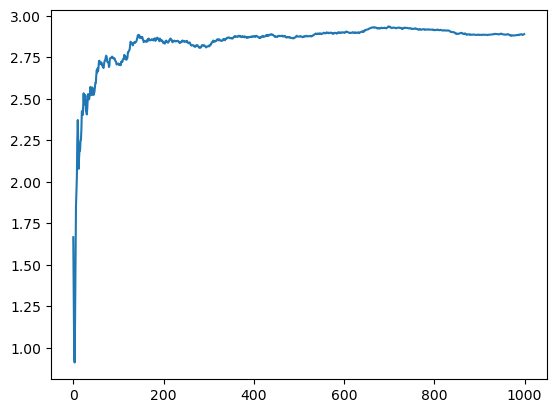

In [2]:
import numpy as np
import matplotlib.pyplot as plt

class MultiArmedBandit:
    def __init__(self, n_arms, reward_distribution):
        self.n_arms = n_arms
        self.reward_distribution = reward_distribution
        self.action_values = np.zeros(n_arms)

    def get_reward(self, action):
        return np.random.normal(self.reward_distribution[action], 1)

    def update_action_value(self, action, reward):
        n = np.sum(action == action)
        self.action_values[action] += (reward - self.action_values[action]) / n

class EpsilonGreedyAgent:
    def __init__(self, epsilon, n_arms):
        self.epsilon = epsilon
        self.n_arms = n_arms
        self.action_values = np.zeros(n_arms)
        self.action_counts = np.zeros(n_arms)

    def select_action(self):
        if np.random.rand() < self.epsilon:
            return np.random.randint(self.n_arms)
        else:
            return np.argmax(self.action_values)

    def update_action_value(self, action, reward):
        self.action_counts[action] += 1
        n = self.action_counts[action]
        self.action_values[action] += (reward - self.action_values[action]) / n

    def run_experiment(self, bandit, n_steps):
        rewards = []
        for i in range(n_steps):
            action = self.select_action()
            reward = bandit.get_reward(action)
            self.update_action_value(action, reward)
            rewards.append(reward)
        return rewards

# Define a 3-armed bandit with mean rewards of 1, 2, and 3
bandit = MultiArmedBandit(3, [1, 2, 3])

# Define an agent with an epsilon of 0.1 and 3 arms
agent = EpsilonGreedyAgent(0.1, 3)

# Run the experiment for 1000 steps
rewards = agent.run_experiment(bandit, 1000)
print(agent.action_values)

# Plot the rewards over time
plt.plot(np.cumsum(rewards) / (np.arange(len(rewards)) + 1))
plt.show()
